<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import warnings

data = pd.read_csv('../data/arima_data.csv', names = ['day', 'price'])
data.head()


,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     60 non-null     object
 1   price   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [3]:
data['day'] = pd.to_datetime(data['day'],format="%Y-%m-%d")
data.set_index('day', inplace=True)
data.head(3)

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190


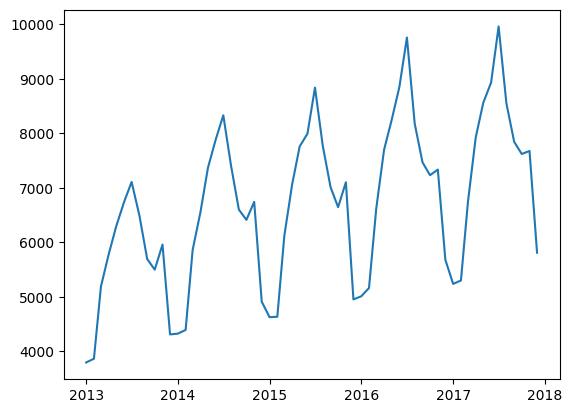

In [4]:
import matplotlib.pyplot as plt
plt.plot(data.index,data['price'])


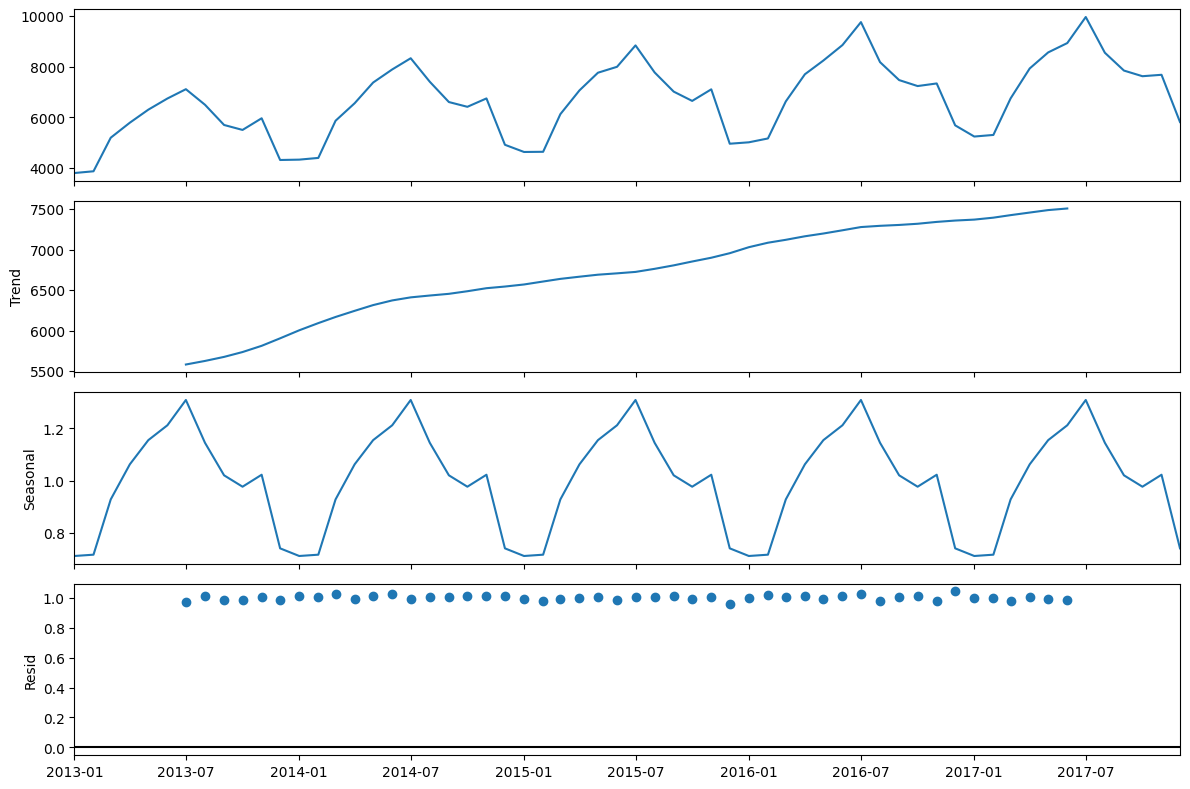

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = data
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()


In [6]:
from statsmodels.tsa.stattools import adfuller

#Train, Test 데이터 구분
training = data[:"2016-12-01"]
test = data.drop(training.index)


adf = adfuller(training, regression='ct')
print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))


ADF Statistic: -1.999719934132788
p-value : 0.6015863303794134


<Axes: xlabel='day'>

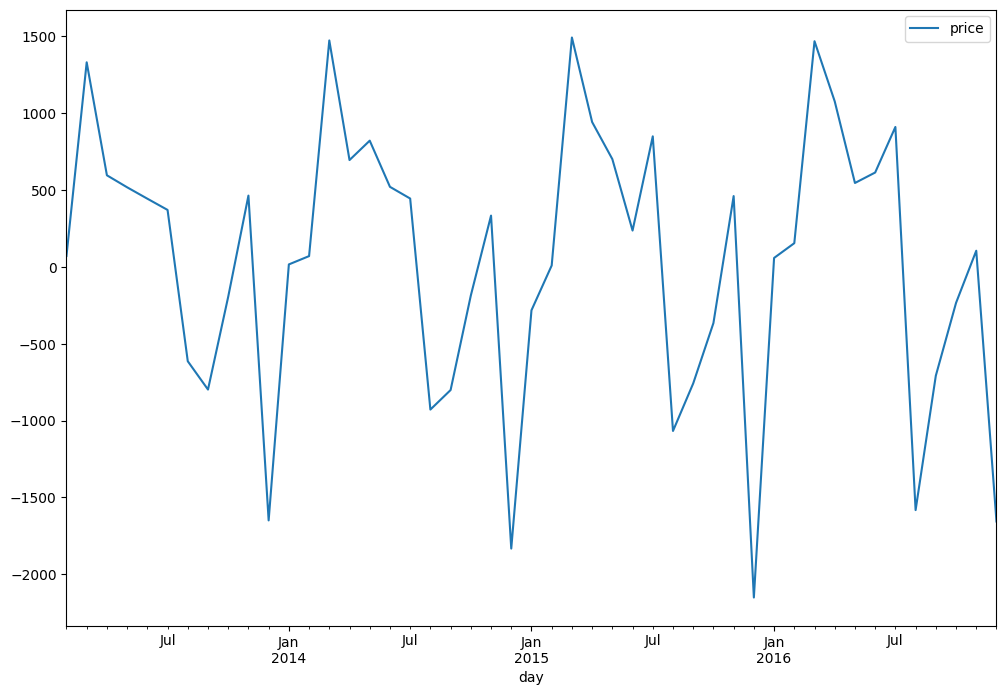

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_data = training.diff(1)
diff_data = diff_data.dropna()
diff_data.plot()


In [8]:
adf = adfuller(diff_data)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))


ADF Statistic: -12.094547576926388
p-value : 2.0851606399614422e-22


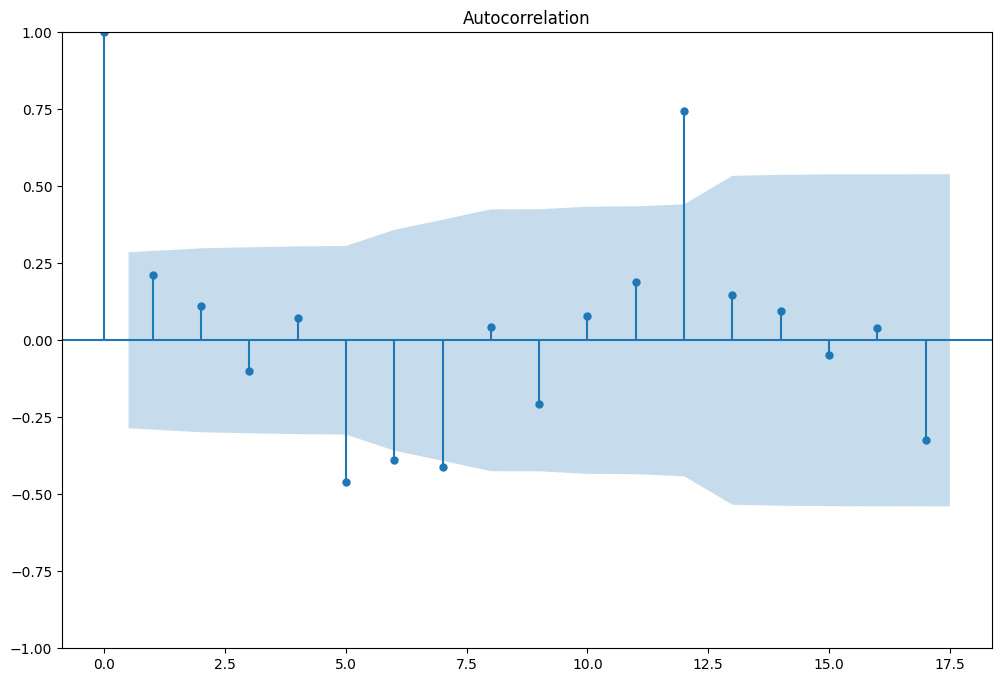

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(diff_data) #AR(p)의 값 확인 가능
plt.show()

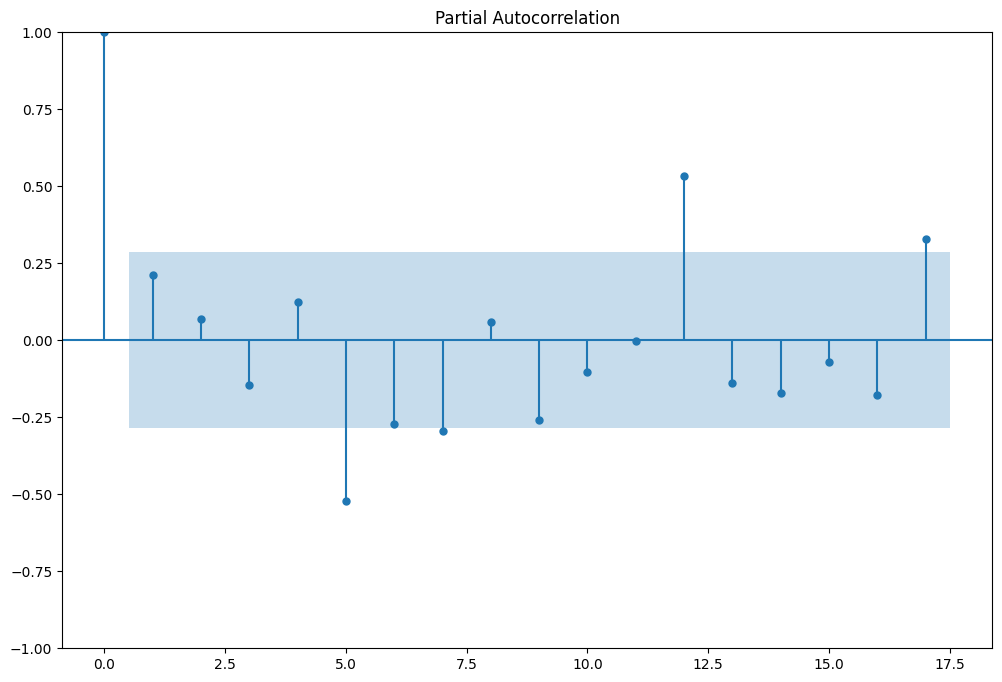

In [23]:
plot_pacf(diff_data) #MA(q)의 값 확인 가능
plt.show()


In [11]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(training, order=(2,1,2))
res = model.fit()
res.summary()


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\A

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -375.875
Date:                Sat, 03 Aug 2024   AIC                            761.750
Time:                        09:00:51   BIC                            771.001
Sample:                    01-01-2013   HQIC                           765.231
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3167      0.190     -6.940      0.000      -1.689      -0.945
ar.L2         -0.3191      0.190     -1.675      0.094      -0.692       0.054
ma.L1          1.9700      0.243      8.121      0.000       1.495       2.445
ma.L2          0.9950      0.241      4.126      0.000       0.522       1.468
sigma2      4.453e+05   1.13e-06   3.93e+11      0.000    4.45e+05    4.45e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.74   Prob(JB):                         0.83
Heteroskedasticity (H):               1.49   Skew:                            -0.21
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.35e+26. Standard errors may be unstable.
"""

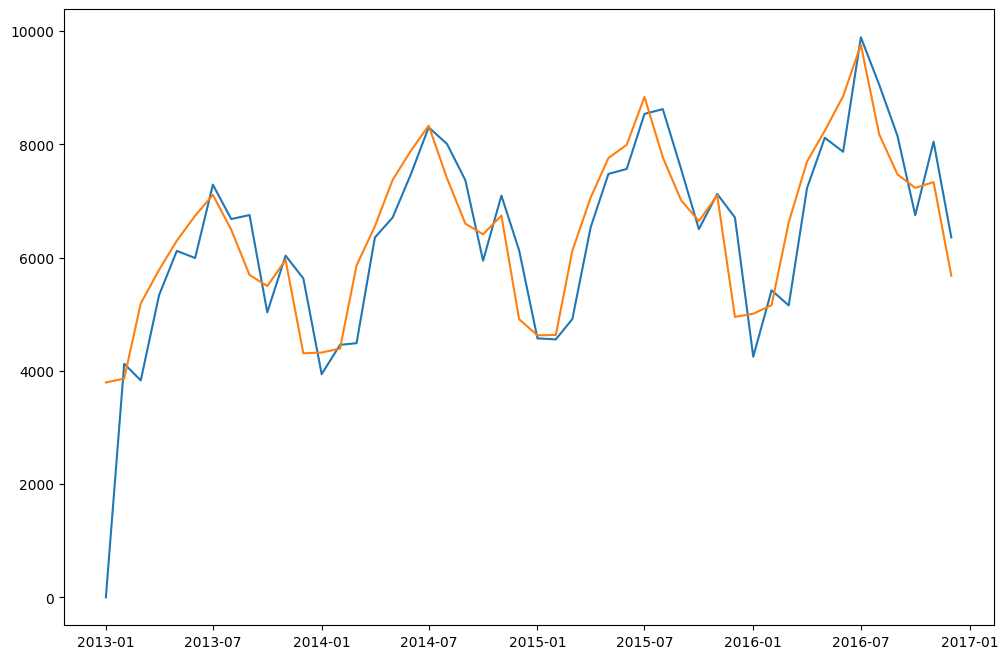

In [12]:
plt.plot(res.predict())
plt.plot(training)


In [13]:
forecast_data = res.forecast(steps=len(test), alpha=0.05) 
# 학습 데이터셋으로부터 test 데이터 길이만큼 예측합니다.

pred_y= forecast_data
pred_y


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2017-01-01    5830.560146
2017-02-01    5508.376754
2017-03-01    5883.921927
2017-04-01    5492.240862
2017-05-01    5888.140676
2017-06-01    5491.834906
2017-07-01    5887.329001
2017-08-01    5493.033200
2017-09-01    5886.010183
2017-10-01    5494.387346
2017-11-01    5884.647980
2017-12-01    5495.748885
Freq: MS, Name: predicted_mean, dtype: float64

In [14]:
test_y = test # 실제 데이터
test_y


,price
day,
2017-01-01,5236
2017-02-01,5299
2017-03-01,6744
2017-04-01,7927
2017-05-01,8561
2017-06-01,8930
2017-07-01,9960
2017-08-01,8548
2017-09-01,7843


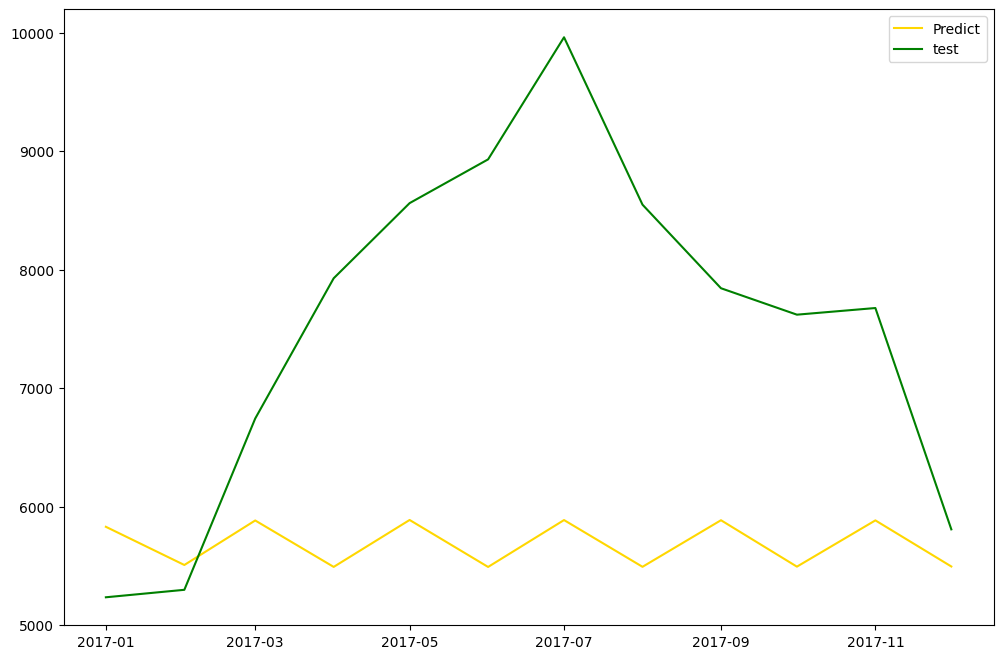

In [15]:
plt.plot(pred_y, color="gold", label='Predict') # 모델이 예상한 가격 그래프
plt.plot(test_y, color="green" , label='test') # 실제 가격 그래프
plt.legend()
plt.show()


In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("r2_score : ", r2_score(test_y, pred_y))
RMSE = mean_squared_error(test_y, pred_y)**0.5
print("RMSE : " , RMSE)


r2_score :  -1.6430396460564052
RMSE :  2302.26085893071


In [25]:
from pmdarima import auto_arima

auto_model = auto_arima(training, start_p=0, d=1, start_q=0,
                        max_p=3, max_q=3, 
                        start_P=0, start_Q=0,
                        max_P=3, max_Q=3, m=12,
                        seasonal=True, information_criterion='aic',
                        trace=True)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=481.846, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=482.652, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=482.466, Time=0.14 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=483.637, Time=0.13 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=483.669, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=481.031, Time=0.05 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=482.740, Time=0.15 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=482.616, Time=0.08 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=482.682, Time=0.22 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=480.687, Time=0.08 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=482.403, Time=0.21 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=48

In [26]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -238.344
Date:                             Sat, 03 Aug 2024   AIC                            480.687
Time:                                     10:06:07   BIC                            483.798
Sample:                                 01-01-2013   HQIC                           481.761
                                      - 12-01-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3185      0.177     -1.801      0.072      -0.665       0.028
sigma2      4.803e+04   1.64e+04      2.924      0.003    1.58e+04    8.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.95   Prob(JB):                         0.56
Heteroskedasticity (H):               1.56   Skew:                            -0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
# 학습 데이터셋으로부터 test 데이터 길이만큼 예측
auto_pred_y= pd.DataFrame(auto_model.predict(n_periods=len(test)), 
                          index=test.index) 
auto_pred_y.columns = ['predicted_price']
auto_pred_y


,predicted_price
day,
2017-01-01,5609.436977
2017-02-01,5761.436977
2017-03-01,7225.436977
2017-04-01,8298.436977
2017-05-01,8841.436977
2017-06-01,9452.436977
2017-07-01,10359.436977
2017-08-01,8777.436977
2017-09-01,8068.436977


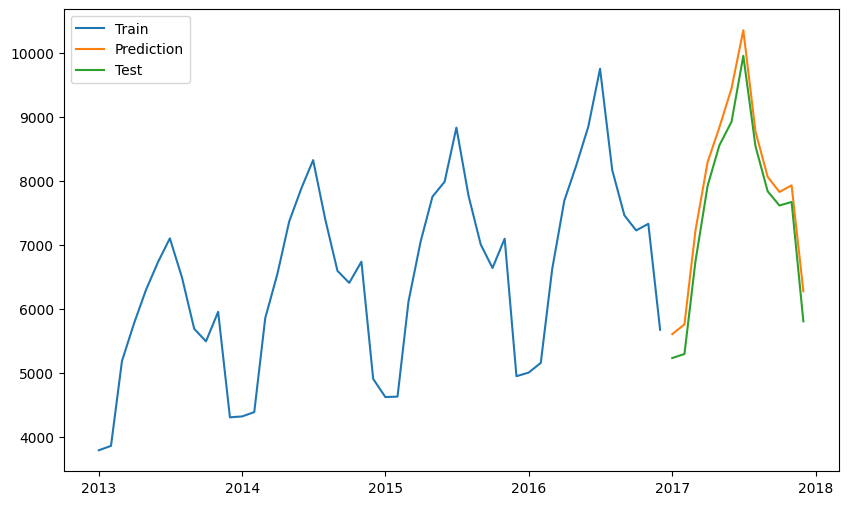

In [28]:
plt.figure(figsize=(10,6))
plt.plot(training, label="Train") # Train 데이터 
plt.plot(auto_pred_y, label="Prediction") # 모델이 예상한 그래프 
plt.plot(test, label="Test") # 실제 가격 그래프 
plt.legend(loc='upper left')
plt.show()


In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("r2_score : ", r2_score(test_y, auto_pred_y))
RMSE = mean_squared_error(test_y, auto_pred_y)**0.5
print("RMSE : " , RMSE)


r2_score :  0.9305467067543264
RMSE :  373.20642594043227
